# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [18]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [5]:
student_data= pd.DataFrame({'Edad':[17,51,27,21,36,48,19,26,54,30],'Retraso':[10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

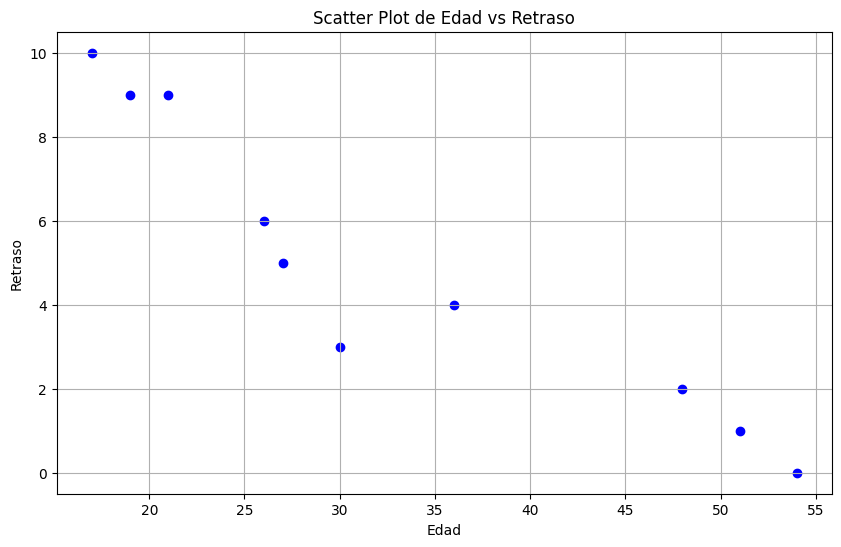

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el DataFrame con los datos proporcionados
student_data = pd.DataFrame({
    'Edad': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Retraso': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Crear el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(student_data['Edad'], student_data['Retraso'], color='blue')
plt.title('Scatter Plot de Edad vs Retraso')
plt.xlabel('Edad')
plt.ylabel('Retraso')
plt.grid(True)
plt.show()


¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

Tal como muestra el scatter plot podriamos hacer una relación entre la edad y el número de retrasos. El gráfico muestra como hay más retraso en el intervalos de 0-20 mientras que va disminuyendo según la edad va incrementando 

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [15]:
# Calcular la covarianza entre 'Edad' y 'Retraso'
covarianza = student_data.cov()
print("\nCovarianza:")
print(covarianza)
#Calcular correlación
correlación = student_data['Edad'].corr(student_data['Retraso'])
print(f'la correlación es de {correlación}')



Covarianza:
               Edad    Retraso
Edad     187.655556 -45.566667
Retraso  -45.566667  12.544444
la correlación es -0.9391626886887122


La covarianza muestra como la varianza de una variable esta relacionada con la varianza de la otra.Mientras que la correlación muesta la dependencia que hay entre varible con la otra variable. En este caso podemos ver que ver que tanto la covarianza como la correlación explican una relación entre ellas negativa (corr < 0), es decir una variable sube al mismo tiempo que la otra disminuye, en este caso se confirma númericamente lo que el gráfico representa que 'cuanto más edad menos retraso'. Sin embargo cabe destacar que la relación entre las dos variables no implica causalidad.

Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [20]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.linear_model import LinearRegression

# Crear el DataFrame con los datos proporcionados
Student_data = pd.DataFrame({
    'Edad': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Retraso': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Definir las variables predictoras (Edad) y la variable de resultado (Retraso)
X = Student_data[['Edad']]
y = Student_data['Retraso']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Imprimir los coeficientes de la regresión
print('Coeficiente dependiente (b):', model.coef_[0])
print('Intersección (a):', model.intercept_)



Coeficiente de pendiente (b): -0.2428207709159809
Intersección (a): 12.888803363135771


Interpretación: 
· Intersección (a): Muestra el valor de Y cuando X es igual a 0. En este caso el valor de retraso cunado la edad es igual a 0.
· Coeficiente dependiente (b): Valor que incrmenta la variable dependiente/resultado (retraso) en función de la independiente/predictora (edad). Vemos que el retraso disminuye un 0.24 por cada año.

Grafica tu modelo de regresión en tu diagrama de dispersión.

ValueError: 'Edad' is not a valid format string (unrecognized character 'E')

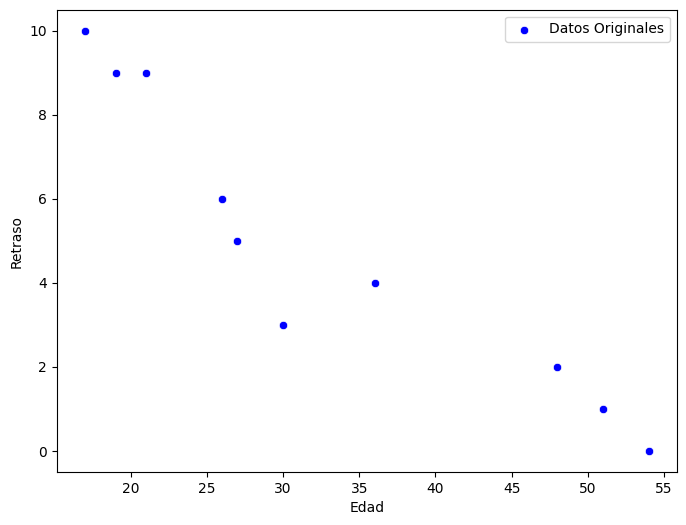

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Edad', y='Retraso', data=Student_data, color='blue', label='Datos Originales')
plt.plot(X, 'Edad', color='red', linewidth=2, label='Línea de Regresión')
plt.title('Regresión Lineal: Retraso en función de la Edad')
plt.xlabel('Edad')
plt.ylabel('Retraso')
plt.legend()
plt.grid(True)
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

In [22]:
import pandas as pd
import statsmodels.api as sm

# Crear el DataFrame con los datos proporcionados
Student_data = pd.DataFrame({
    'Edad': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Retraso': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Definir las variables predictoras (Edad) y la variable de resultado (Retraso)
X = Student_data[['Edad']]
y = Student_data['Retraso']

# Añadir una constante a la variable predictora (para obtener el término de intercepción)
X = sm.add_constant(X)

# Crear un modelo de regresión lineal usando OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                Retraso   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           5.57e-05
Time:                        11:50:53   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Para poder responder a la pregunta se ha tenido que calcular R-squared para saber si las vairiable analizada es significativa. Tal como se refleja en la tabla el valor R^2= 0.882, valor cercano al 1 el cual indica que la variable independiente(edad) predice el 88% de la variable analizada (retraso), por lo tanto es significativa.Añadir que el analisis muestra una kurtosis del 3, lo que indica una distribución normal de los datos.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [24]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('/Users/criiiss/ironhack/notebook/labs/lab-continuous-probability-distributions-es/your-code/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [27]:
import pandas as pd

# Crear el DataFrame con los datos proporcionados (ejemplo simplificado)
df = pd.DataFrame(vehicles)

# Calcular correlaciones
correlations = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

# Imprimir las correlaciones
print("Correlaciones entre las variables y las Emisiones de CO2:")
print(correlations)


# Interpretación de las correlaciones:
# - Observa los valores absolutos de las correlaciones con 'CO2 Emission Grams/Mile'.
# - La variable con la correlación más alta (más cercana a 1 en valor absoluto) será la más importante.
# - La variable con la correlación más baja (más cercana a 0 en valor absoluto) proporcionará la menor cantidad de información útil.

#Tal como muestra la tabla calculada la que afecta más es el numero de fuel barrels por año seguido de coste por año.


Correlaciones entre las variables y las Emisiones de CO2:
                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

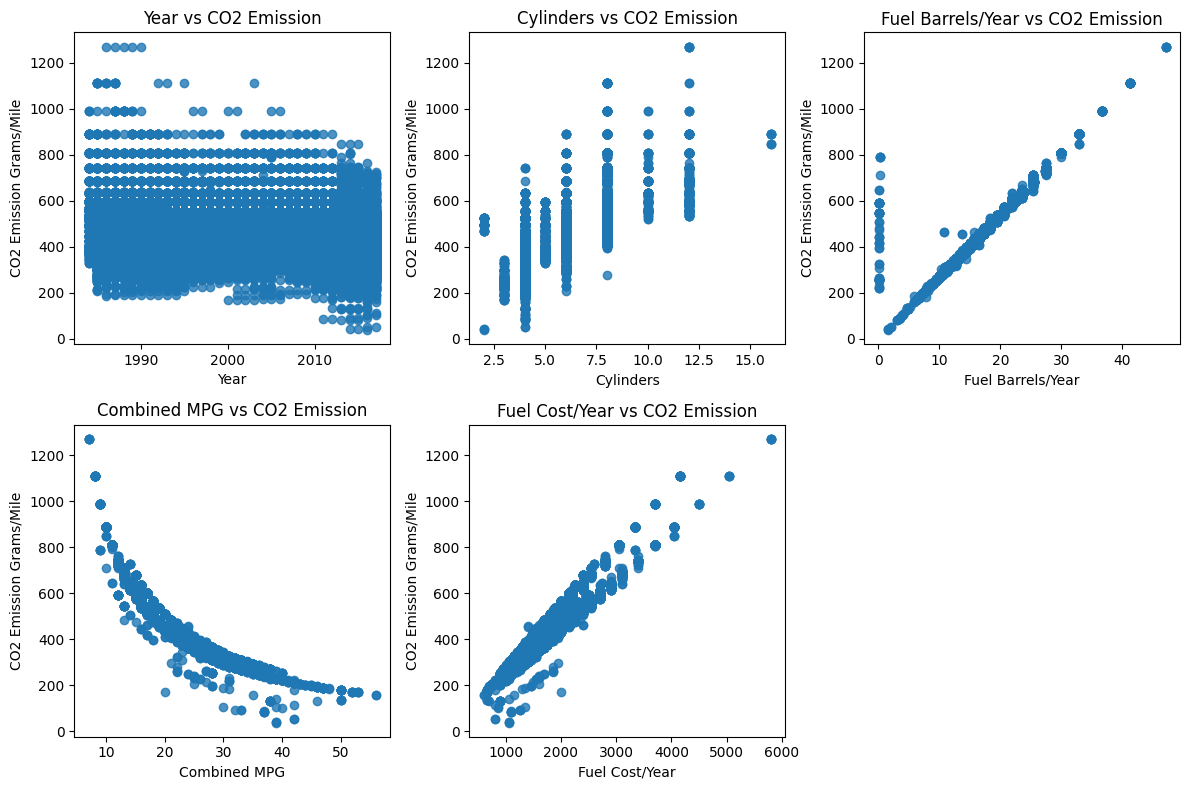

In [30]:
# Crear scatter plots para cada par de variables
plt.figure(figsize=(12, 8))

# Scatter plot para Year vs CO2 Emission Grams/Mile
plt.subplot(231)
plt.scatter(df['Year'], df['CO2 Emission Grams/Mile'], alpha=0.8)
plt.title('Year vs CO2 Emission')
plt.xlabel('Year')
plt.ylabel('CO2 Emission Grams/Mile')

# Scatter plot para Cylinders vs CO2 Emission Grams/Mile
plt.subplot(232)
plt.scatter(df['Cylinders'], df['CO2 Emission Grams/Mile'], alpha=0.8)
plt.title('Cylinders vs CO2 Emission')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emission Grams/Mile')

# Scatter plot para Fuel Barrels/Year vs CO2 Emission Grams/Mile
plt.subplot(233)
plt.scatter(df['Fuel Barrels/Year'], df['CO2 Emission Grams/Mile'], alpha=0.8)
plt.title('Fuel Barrels/Year vs CO2 Emission')
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('CO2 Emission Grams/Mile')

# Scatter plot para Combined MPG vs CO2 Emission Grams/Mile
plt.subplot(234)
plt.scatter(df['Combined MPG'], df['CO2 Emission Grams/Mile'], alpha=0.8)
plt.title('Combined MPG vs CO2 Emission')
plt.xlabel('Combined MPG')
plt.ylabel('CO2 Emission Grams/Mile')

# Scatter plot para Fuel Cost/Year vs CO2 Emission Grams/Mile
plt.subplot(235)
plt.scatter(df['Fuel Cost/Year'], df['CO2 Emission Grams/Mile'], alpha=0.8)
plt.title('Fuel Cost/Year vs CO2 Emission')
plt.xlabel('Fuel Cost/Year')
plt.ylabel('CO2 Emission Grams/Mile')

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar los scatter plots
plt.show()


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [26]:
import pandas as pd
import statsmodels.api as sm

# Crear el DataFrame con los datos proporcionados (ejemplo simplificado)
data = {
    'Year': [1984, 1984, 1985, 1985, 1987],
    'Cylinders': [4.0, 6.0, 4.0, 6.0, 6.0],
    'Fuel Barrels/Year': [19.388824, 25.354615, 20.600625, 25.354615, 20.600625],
    'Combined MPG': [17, 13, 16, 13, 16],
    'Fuel Cost/Year': [1950, 2550, 2100, 2550, 2550],
    'CO2 Emission Grams/Mile': [522.764706, 683.615385, 555.437500, 683.615385, 555.437500]
}

df = pd.DataFrame(data)

# Definir las variables predictoras (X) y la variable de resultado (y)
X = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = df['CO2 Emission Grams/Mile']

# Añadir una constante a las variables predictoras (intercepción)
X = sm.add_constant(X)

# Crear un modelo de regresión lineal usando OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                    nan
Method:                      Least Squares   F-statistic:                       nan
Date:                     Sat, 13 Jul 2024   Prob (F-statistic):                nan
Time:                             12:09:14   Log-Likelihood:                 109.65
No. Observations:                        5   AIC:                            -209.3
Df Residuals:                            0   BIC:                            -211.2
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / s

Primero vemos que el R^2 es igual a 1, por este motivo el model es significativo y explica la emision del C02 en función de las otras variables independientes que en este caso son Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year'. Por otro lado los datos tiene una distribución normal y las variables que tienen más influencia son FuelBarrer/year.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [ ]:
# Your code here.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [ ]:
# Your code here.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [2]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*